In [1]:
from pandas_datareader import data as pdr
import datetime
from datetime import timedelta
import pandas as pd
import yfinance as yf
import yahoofinancials
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


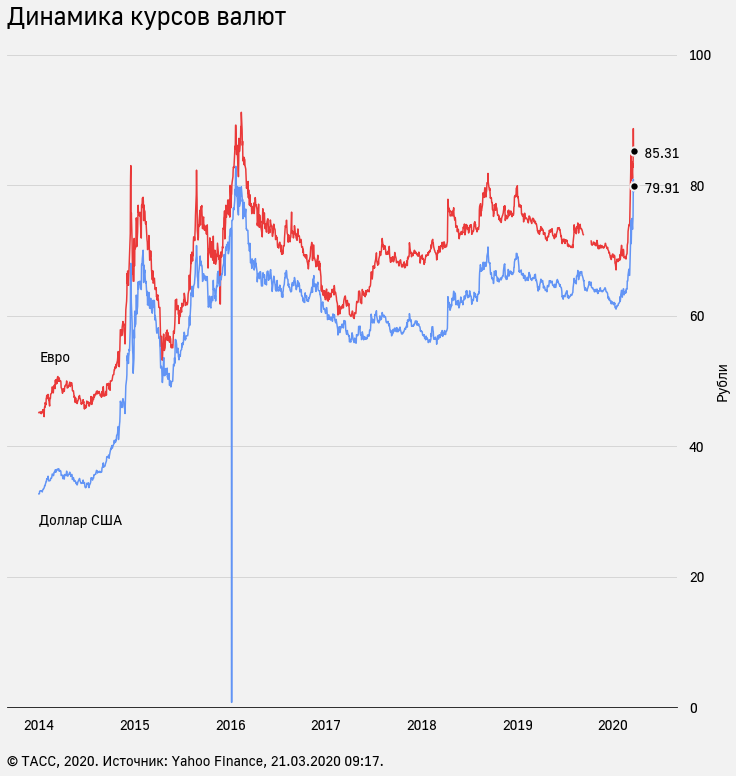

In [8]:
now = datetime.datetime.now()
now = now.strftime('%d.%m.%Y %H:%M')

start = '2014-01-01'
today = datetime.date.today()
day_before = datetime.date.today() - timedelta(days=1)
yf.pdr_override()
f = pdr.get_data_yahoo(["USDRUB=X","EURRUB=X"], start=start, end=today)
f = pd.DataFrame(f)
yf.pdr_override()
fm = pdr.get_data_yahoo(["USDRUB=X","EURRUB=X"], start=day_before, end=today, interval='1h')
fm = pd.DataFrame(fm)
fm = fm.iloc[[-1]]
data = [f, fm]
data = pd.concat(data)
data = data[['Close']]
fm = fm[['Close']]

x = data.index
y1 = data.loc[:,(slice(None),'EURRUB=X')]
y2 = data.loc[:,(slice(None),'USDRUB=X')]
mindata = y2.idxmin()


#x = x.drop(mindata).values
#y1 = y1.drop(mindata).values
#y2 = y2.drop(mindata).values

x2 = fm.index
yf1 = fm.loc[:,(slice(None),'EURRUB=X')].values
yf2 = fm.loc[:,(slice(None),'USDRUB=X')].values
euro = '{:.2f}'.format(yf1[0][0])
dollar = '{:.2f}'.format(yf2[0][0])
time = fm.index.strftime('%d.%m.%Y, %H:%M')

yf1 = fm.loc[:,(slice(None),'EURRUB=X')].values
yf2 = fm.loc[:,(slice(None),'USDRUB=X')].values
euro = '{:.2f}'.format(yf1[0][0])
dollar = '{:.2f}'.format(yf2[0][0])
time = fm.index.strftime('%d.%m.%Y')

f = plt.figure(
    figsize=(12, 12),
)

f.patch.set_facecolor('#F2F2F2')

ax = f.add_subplot(111)
ax.yaxis.tick_right()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

ax.tick_params(axis="x", length=0, pad=12)
ax.tick_params(axis="y", length=0, pad=12)

ax.grid(axis = 'y', color = 'grey', alpha = .3)

ax.set_ylabel('Рубли', fontname = "GOST UI 2", fontsize=14)
ax.yaxis.set_label_position("right")

ax.patch.set_facecolor('#F2F2F2')

plt.plot(x, y1, color='#EA3939')
plt.plot(x, y2, color='#6294F5')

plt.ylim(0, 100)
plt.xlim('2013-09-01', '2020-09-01')
plt.xticks(fontname = "GOST UI 2", fontsize=14)
plt.yticks(fontname = "GOST UI 2", fontsize=14)
plt.title('Динамика курсов валют', fontname = "GOST UI 2", fontsize=25, loc='left',pad=30)

plt.text('2013-9-1', -9, ('© ТАСС, 2020. Источник: Yahoo Finance, '+now+'.'), fontname = "GOST UI 2", fontsize=14)
plt.text('2014-1-1', 28, ('Доллар США'), fontname = "GOST UI 2", fontsize=14)
plt.text('2014-1-1', 53, ('Евро'), fontname = "GOST UI 2", fontsize=14)

plt.text(x2, yf1-1, '   ' + euro, fontname = "GOST UI 2", fontsize=14)
plt.text(x2, yf2-1, '   ' + dollar, fontname = "GOST UI 2", fontsize=14)

plt.scatter(x2, yf1, color = 'black', zorder=2.5, edgecolors='#F2F2F2', s=70, linewidths=2)
plt.scatter(x2, yf2, color = 'black', zorder=2.5, edgecolors='#F2F2F2', s=70, linewidths=2)

f.savefig('prices.png', dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = .5, facecolor = '#F2F2F2')
plt.show()